Importamos Librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import sklearn.metrics as sm
from sklearn import linear_model
from scipy.stats import norm, skew

Pregunta 2

Se tienen los siguientes parámetros


1.   estimator (base_estimator): El estimador o modelo base del cual se crea el ensamble. Si no se especifica esto se hace con árboles de decision de max_depth de 3.
2.   n_estimators: el numero máximo de estimadores o modelos base en el cual el algoritmo de boosting se detiene. Si se llega a un modelo perfecto, se detiene antes.
3.   learning_rate: El peso que se le aplica a cada regresor en cada iteración del boosting. Un learning rate más alto aumenta la contribución de cada regresor.
4.   loss: La función de error que se utiliza al actualizar los pesos tras cada iteracion de boosting. 
5.   random_state: Controla la random seed. Controla el bootstrap de los pesos utilizados para entrenar los modelos base. 





Pregunta 3

Modelo de regresión para determinar TARGET_deathRate. Media por capita

Busca modelar el death rate a través de varias variables.

Estas incluyen:

Edad Media de los residentes de un condado

Tamaño promedio de vivienda por condado

Porcentaje de la población entre 18 y 24 años y sus respectivos niveles educativos

Porcentaje de la población mayor de 25 años y sus respectivos niveles educativos

Porcentaje de población empleada y desempleada

Porcentaje de la población que cuenta con seguros de gastos medicos.

Composición racial de la población en porcentajes

Tasa de natalidad por condado

Pregunta 4

Se cargan los datos a un data frame

In [ ]:
df = pd.read_csv('cancer_reg.csv')

Se ve información básica del df

In [ ]:
df.info

del data frame se eliminan las columnas de median age male y median age female, no queremos hacer dos modelos, solo uno. Se usará la variable más general de edad: Median Age. 

Se elimina la variable geography ya que es una cadena de texto, indica el condado

También se elimina binned income ya que son datos en intervalos

In [ ]:
df = df.drop(columns =["medianagemale", "medianagefemale", "geography", "binnedinc"])

Se procede a revisar que columnas son las que más porcentaje de nulos tienen:

In [ ]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'% De valores nulos' :all_data_na})
missing_data.head(20)

,% De valores nulos
pctsomecol18_24,74.991795
pctprivatecoveragealone,19.986872
pctemployed16_over,4.988513


Se eliminan las columnas de PctSomeCol18_24 y PctPrivateCoverageAlone ya que tienen un alto porcentaje de valores nulos. Si simplemente se eliminan dichos valores nulos, se perdería la mayoría de la info del df.

In [ ]:
df = df.drop(columns =["pctsomecol18_24", "pctprivatecoveragealone"])

Se revisa la correlación con la variable objetivo

In [ ]:
corr_Y_X=pd.DataFrame(df[df.columns[:]].corr()['target_deathrate'][:])
corr_Y_X["target_deathrate"].sort_values()

pctbachdeg25_over        -0.485477
medincome                -0.428615
pctemployed16_over       -0.412046
pctprivatecoverage       -0.386066
pctmarriedhouseholds     -0.293325
pctbachdeg18_24          -0.287817
pctempprivcoverage       -0.267399
percentmarried           -0.266820
pctotherrace             -0.189894
pctasian                 -0.186331
pctwhite                 -0.177400
avganncount              -0.143532
popest2015               -0.120073
avgdeathsperyear         -0.090715
birthrate                -0.087407
avghouseholdsize         -0.036905
studypercap              -0.022285
medianage                 0.004375
pctnohs18_24              0.088463
pctblack                  0.257024
pcths18_24                0.261976
pctunemployed16_over      0.378412
pctpubliccoverage         0.404572
pcths25_over              0.404589
povertypercent            0.429389
pctpubliccoveragealone    0.449358
incidencerate             0.449432
target_deathrate          1.000000
Name: target_deathra

Se revisa el skewness

In [ ]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
popest2015,14.282891
avgdeathsperyear,11.943305
avganncount,10.675202
medianage,9.985026
studypercap,8.709400
pctasian,7.414388
pctotherrace,4.949741
pctblack,2.256957
pctbachdeg18_24,1.955238
medincome,1.407377


Se decide eliminar aquellas con skewness mayor a 10, menos median Age que consideramos importante, por valores de outliers

In [ ]:
df.drop(columns=["avganncount","avgdeathsperyear","popest2015"],axis=1,inplace=True)

Se revisa que otras columnas tienen nulos, solo queda PctEmployed16_Over

In [ ]:
df.isnull().sum()

target_deathrate            0
incidencerate               0
medincome                   0
povertypercent              0
studypercap                 0
medianage                   0
avghouseholdsize            0
percentmarried              0
pctnohs18_24                0
pcths18_24                  0
pctbachdeg18_24             0
pcths25_over                0
pctbachdeg25_over           0
pctemployed16_over        152
pctunemployed16_over        0
pctprivatecoverage          0
pctempprivcoverage          0
pctpubliccoverage           0
pctpubliccoveragealone      0
pctwhite                    0
pctblack                    0
pctasian                    0
pctotherrace                0
pctmarriedhouseholds        0
birthrate                   0
dtype: int64

Se proceden a eliminar los nans restantes

In [ ]:
df.dropna(inplace=True)

Se revisa que ya no existan Nans

In [ ]:
df.isnull().sum()

target_deathrate          0
incidencerate             0
medincome                 0
povertypercent            0
studypercap               0
medianage                 0
avghouseholdsize          0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctemployed16_over        0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

Un vistazo a como se ve el df

In [ ]:
df

,target_deathrate,incidencerate,medincome,povertypercent,studypercap,medianage,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,...,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,164.9,489.800000,61898,11.2,499.748204,39.3,2.54,52.5,11.5,39.5,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,161.3,411.600000,48127,18.6,23.111234,33.0,2.34,44.5,6.1,22.4,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,174.7,349.700000,49348,14.6,47.560164,45.0,2.62,54.2,24.0,36.6,...,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,194.8,430.400000,44243,17.1,342.637253,42.8,2.52,52.7,20.2,41.2,...,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,144.4,350.100000,49955,12.5,0.000000,48.3,2.34,57.8,14.9,43.0,...,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,146.4,453.549422,49508,13.0,723.414516,32.2,2.35,45.1,2.9,17.7,...,80.0,52.9,24.3,9.5,94.291726,1.145104,1.386542,1.014038,43.276779,3.977583
3042,149.6,453.549422,46961,12.4,0.000000,44.2,2.08,51.0,20.9,27.9,...,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,150.1,453.549422,48609,18.8,377.175494,30.4,2.90,52.6,26.7,33.9,...,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,153.9,453.549422,51144,15.0,1968.959926,30.9,3.04,54.8,19.7,44.5,...,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


Se separa en X y Y. Variables regresoras y el target

In [ ]:
X = df.drop(columns="target_deathrate")
y = df["target_deathrate"]

Se divide en train y test para el ajuste y evaluacion de los modelos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

Pregunta 5

Se normalizan (centrar y escalar) los datos

In [ ]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

Preguntas 6, 7 y 8

Regresion Lineal

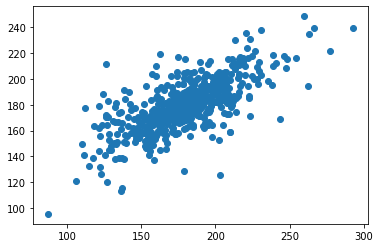

In [ ]:
lm=LinearRegression()
lm.fit(X_train_std, y_train)
y_pred=lm.predict(X_test_std)
plt.scatter(y_test, y_pred)

plt.show()

Error Cuadtático Medio

In [ ]:
 ECM_RLin = mean_squared_error(y_test, y_pred)
 print("El error cuadratico medio es: ", ECM_RLin)

El error cuadratico medio es:  385.65905685262027


Otras medidas

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))  
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 14.33
Median absolute error = 10.18
Explain variance score = 0.51
R2 score = 0.51


Regresión lineal con ridge

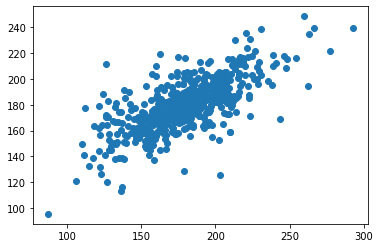

In [ ]:
lm = Ridge()
lm.fit(X_train_std, y_train)
y_pred=lm.predict(X_test_std)
plt.scatter(y_test, y_pred)

Error Cuadratico Medio

In [ ]:
 ECM_Ridge = mean_squared_error(y_test, y_pred)
 print("El error cuadratico medio es: ", ECM_Ridge)

El error cuadratico medio es:  385.59921277537626


Otras medidas

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))  
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 14.33
Median absolute error = 10.2
Explain variance score = 0.51
R2 score = 0.51


Regresion Lineal con Lasso

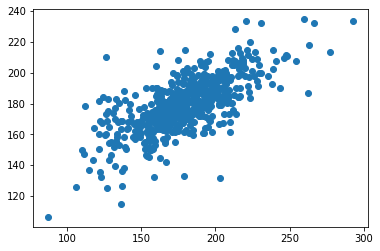

In [ ]:
lm = linear_model.Lasso()
lm.fit(X_train_std, y_train)
y_pred=lm.predict(X_test_std)
plt.scatter(y_test, y_pred)

Error cuadratico Medio

In [ ]:
 ECM_Lasso = mean_squared_error(y_test, y_pred)
 print("El error cuadratico medio es: ", ECM_Lasso)

El error cuadratico medio es:  398.55784823686304


Otras Medidas

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))  
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 15.1
Median absolute error = 11.39
Explain variance score = 0.49
R2 score = 0.49


Modelar con AdaBoost

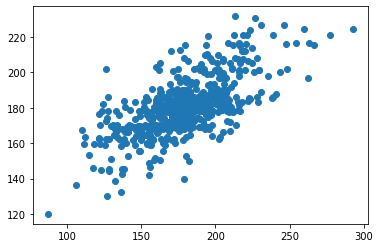

In [ ]:
regr = AdaBoostRegressor(n_estimators=100 , random_state=0)
regr.fit(X_train_std, y_train)
y_pred = regr.predict(X_test_std)
plt.scatter(y_test, y_pred)

Error Cuadrático Medio

In [ ]:
 ECM_Ada = mean_squared_error(y_test, y_pred)
 print("El error cuadratico medio es: ", ECM_Ada)

El error cuadratico medio es:  436.18326706478973


Otras Medidas

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))  
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 16.21
Median absolute error = 12.68
Explain variance score = 0.45
R2 score = 0.44


Modelar con Bagging

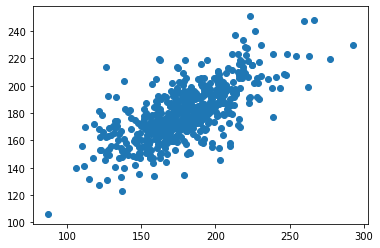

In [ ]:
regr = BaggingRegressor()
regr.fit(X_train_std, y_train)
y_pred = regr.predict(X_test_std)
plt.scatter(y_test, y_pred)

Error Cuadrático Medio

In [ ]:
 ECM_Bag = mean_squared_error(y_test, y_pred)
 print("El error cuadratico medio es: ", ECM_Bag)

El error cuadratico medio es:  409.28248998272886


Otras Medidas

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))  
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 15.11
Median absolute error = 11.19
Explain variance score = 0.48
R2 score = 0.48


Pregunta 9:

El desempeño de modelos de regresión es muy parecido entre los 5 modelos ajustados en esta práctica. Existe muy poca diferencia entre los ECMs de la regresión lineal y la regularizada con ridge. La Lasso presenta un poco más de error. La regresión con AdaBoost es la que mayor ECM tiene mientras que la regresión con Bagging es la segunda con mayor error.

En cuanto al parámetro de R cuadrada, es decir la varianza del target explicada por el modelo, todos explicacn entre un 44% y un 52%. Los modelos que más explican son Regresión Lineal y Regresión Lineal regularizada con Ridge. El modelo que menos explica es el de AdaBoost. 